<a href="https://colab.research.google.com/github/yash121299/PyTorch_Learning/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Exploring a PyTorch workflow end-to-end.

Resources:
* Ground Truth notebook (Github Link) - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book Version (Online Notebook) - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a Question (Github Discussions page) - https://github.com/mrdbourke/pytorch-deep-learning/discussions

What we are covering:

1. Data (preparing and loading)
2. Build model
3. Fitting the model to data (training)
4. Making predictions and evaluating a model (inference)
5. Saving and loading a model
6. Putting it all together

In [50]:
# Making this into a dictonary so we can reference to it later on in the code
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "Making predictions and evaluating the model (inference)",
    5: "Saving and loading the model",
    6: "Putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'Making predictions and evaluating the model (inference)',
 5: 'Saving and loading the model',
 6: 'Putting it all together'}

In [51]:
#Importing Libraries
import torch
from torch import nn # nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

print(torch.__version__)

2.6.0+cu124


`nn` Module Documentation - https://docs.pytorch.org/docs/stable/nn.html

`nn` contains the building blocks (mostly layers) for neural networks. Our job is to organize those layers to create any type of neural networks. A neural network is basically a computational graph.

## 1.Data (Preparing and Loading)

Data can be almost anything... in machine learning.

* Excel Spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning (Deep Learning) is a game of 2 parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation


To showcase this, let's create some *known* data using the linear regression formula

     The general equation for a linear regression is y = mx + b, where:

      y: is the dependent variable (the one you're trying to predict)

      x: is the independent variable (the one you're using to make predictions)

      m: is the slope of the line (also called gradient), representing the change in y for every unit change in x

      b: is the y-intercept, representing the value of y when x is zero.

We'll use the linear regression formula to make a straight line with *known* **parameters**.

In [52]:
# Create *known* parameters
weight = 0.7
bias = 0.3
# These terms are very common in neural networks but for our current goal, in the linear regression formula -> m is weights and b is bias

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [53]:
len(X),len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Lets create a training and test set for our data

In [54]:
# Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [55]:
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

In [56]:
len(X_train),len(y_train)

(40, 40)

In [57]:
len(X_test),len(y_test)

(10, 10)

how might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, Visualize and Visualize!"

Documentation for `plt.scatter` - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [58]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot the training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")

  # Plot the test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")

  # Plotting predictions if they exist else dont
  if predictions is not None:
    # Plotting predictions in red
    plt.scatter(test_data,predictions,c = "r",s=4,label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

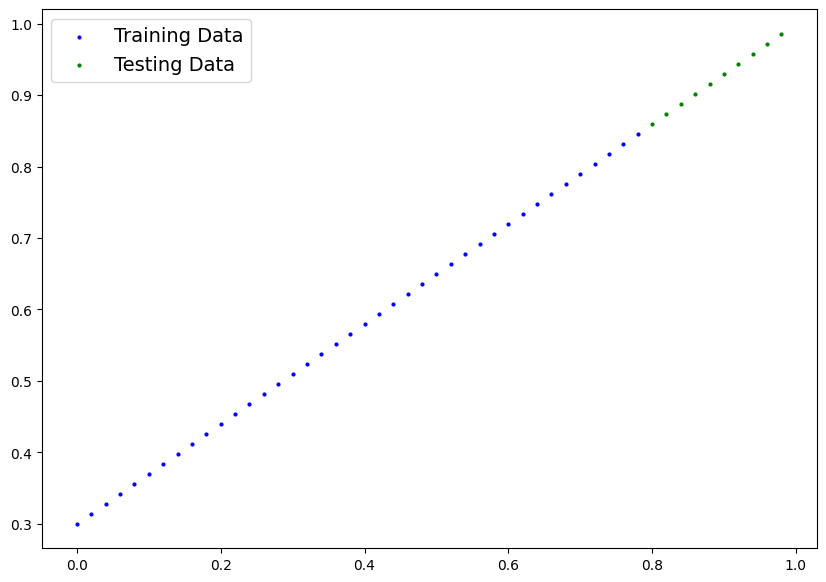

In [59]:
plot_predictions() # Since we hardcoded the inputs we can just run as is without input params

Blue dots are input , green dots are ideal output

Red dots would be the predictions. Since we dont have any predictions yet, the red dots are missing.

An ideal (perfect) model would have the red dots exactly over the green dots.



## 2. Build model

Our first PyTorch model!

Linear Regression Info - https://en.wikipedia.org/wiki/Linear_regression

We are going to be building classes throughout the course. To get familiar with OOP in Python go through the following link

Classes in Python - https://realpython.com/python3-object-oriented-programming/

One iteration of an computation that looks like the linear regression equation is called forward computation

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to the ideal values/representation) the ideal values (the weight & bias) values we used for creating the data


How does it do so?
Through 2 main algorithms:
1. Gradient Descent
2. Backpropagation

Gradient Descent is why we have requires_grad as True. What that does is when we run computations for the model, PyTorch will track the gradients for the parameters (weights and bias) which will then update the parameters through a combination of Gradient Descent and Backpropagation. PyTorch has this implemented so that we dont have to and we can write the high level code for the models to trigger these.

Resources for more information:

Gradient Descent - https://medium.com/@abhaysingh71711/gradient-descent-explained-the-engine-behind-ai-training-2d8ef6ecad6f

https://www.3blue1brown.com/lessons/gradient-descent



Backpropagation - https://www.ibm.com/think/topics/backpropagation

https://www.3blue1brown.com/lessons/backpropagation



In [60]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module (Lego building brick for PyTorch models)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) # Start with random and update, requires grad to track gradient, torch.float is the default type
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) # Start with random and update, requires grad to track gradient, torch.float is the default type

  # Forward method to define the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor: # <- Here, "x" is the input data (in our current case its the training data)
    return self.weights*x + self.bias # this is the linear regression formula

`nn.Module` Documentation - https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html

`nn.Parameter` Documentation - https://docs.pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html

`torch.randn` Documentation - https://docs.pytorch.org/docs/2.7/generated/torch.randn.html

### PyTorch model building essentials

* `torch.nn` - contains all of the building blocks for computational graphs (a neural can be considered a computational graph)
* `torch.nn.Parameter` - What parameters should our model try and learn (Often a layer from torch.nn will set these for us)
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it you have to overwrite forward()
* `torch.optim` - This is where the optimizers in Pytorch live, they will help with Gradient Descent
* `def forward()` -  All nn.Module subclasses require you to ovewrite forward(), this method defines what happens in the forward computation


Best resource is the Pytorch Cheatsheet - https://docs.pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Seeing whats inside our model. We can check our or model parameters or what is inside our model using `.parameters()`

In [61]:
# Create a random seed (for uniformity)
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

model_0

LinearRegressionModel()

In [62]:
# Checking out the parameters of our model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [63]:
# List named parameters of the model
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [64]:
# Known parameters declared initially to generate data
weight,bias

(0.7, 0.3)

Our goal with the model is to get these random named parameter values for weights and bias to get as close to or match the values for the known parameters weight & bias

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, its going to run it through our `forward()` method

In [65]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [66]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

We use a context manager i.e. `torch.inference_mode()` here. We could do it without this and we would still get the output but with also a grad funtion in the predictions.


What inference mode does is that it turns off the gradient tracking. Since we are doing inference and not training we dont need to keep track of gradients. Which makes it so pytorch is keeping track of less numbers in the background giving us a performance boost.

See more on inference mode here: https://x.com/PyTorch/status/1437838231505096708?lang=en

inference mode is new, old way is torch.no_grad(). A lot of people use this but there are some advantages to inference mode over no grad which are mentioned on the above link

In [67]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

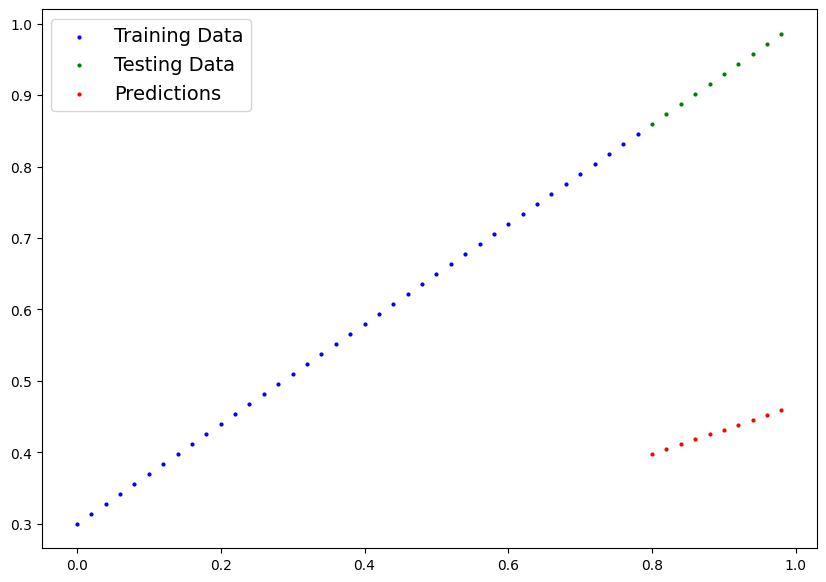

In [68]:
plot_predictions(predictions=y_preds)

## Training a Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters

Or in other words from a poor representation of the data to a better representation of data

One way to measure how poor/how wrong the predictions are of our model -> Use a loss function (also called a criterion or a cost function)


Pytorch has many inbuilt loss functions -  https://docs.pytorch.org/docs/stable/nn.html#loss-functions

Optimizers in PyTorch - https://docs.pytorch.org/docs/stable/optim.html (SGD and its iterations are very popular)

Parameter -> Something that the model sets by itself, HyperParameter -> Something that we set as a programmer


Note: Throughout the course, We're going to refer to it as loss function

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, **lower is better**

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (Eg. weight & bias in our case) to improve the loss function
  * Inside the optimizer, you'll often have to set two parameters:
    * `params` - the model parameters you'd like to optimize, for example in our case: params=model_0.prarmeters
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters at each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop



We will be using the `L1Loss` in our case, which is basically the mean absolute error

Documentation - https://docs.pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss

In [69]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [70]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [71]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (Stochastic  Gradient Descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set. Smaller the learning rate-> smaller the adjustment in the model parameters and vice versa

In [72]:
loss_fn

L1Loss()

In [73]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Which loss function and optimizer should I use?

Problem sprecific. Trail and Error is key. For regression problems like ours -> a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` should work fine.

But for classification problems like dog vs cat images, we would likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do following...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on the data - also called Forward Propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss  (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [74]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [73]:
# An epoch is one loop through the data... (this is a hyper parameter because we have set it ourselves)
epochs = 1
### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train) # Check documentation for order of predictions and true labels, is different for different loss functions

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propagation on the loss with respect to the parametets of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop soo we have to zero them above in step 3 for the next iteration of the loop


  # model_0.eval() # turns off gradient tracking
